In [1]:
pip install fbprophet

In [62]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
dataset = r'drive/My Drive/Colab Notebooks/data.xlsx'
dataset

'drive/My Drive/Colab Notebooks/data.xlsx'

In [64]:
import pandas as pd

df = pd.read_excel(dataset)
df.head()

,Unnamed: 0,Date,MaxUtil_Link_1,Capacity_1,MaxUtil_Link_2,Capacity_2
0,NaN,2020-01-01,199.94,300,128.21,200
1,NaN,2020-02-01,198.01,300,129.8,200
2,NaN,2020-03-01,197.19,300,124.44,200
3,NaN,2020-04-01,206.93,300,127.55,200
4,NaN,2020-05-01,228.66,400,130.25,200


In [65]:
df = df.drop(columns=['Unnamed: 0'])

In [66]:
df = df[df['MaxUtil_Link_1']!='-']

In [67]:
df

,Date,MaxUtil_Link_1,Capacity_1,MaxUtil_Link_2,Capacity_2
0,2020-01-01,199.94,300,128.21,200
1,2020-02-01,198.01,300,129.8,200
2,2020-03-01,197.19,300,124.44,200
3,2020-04-01,206.93,300,127.55,200
4,2020-05-01,228.66,400,130.25,200
5,2020-06-01,236.45,400,133.02,200
6,2020-07-01,240.9,400,132.24,200
7,2020-08-01,248.15,400,137,200
8,2020-09-01,253.59,400,144.85,200
9,2020-10-01,353.61,400,144.5,200


In [68]:
df =  df.drop(columns=['Capacity_1','MaxUtil_Link_1','Capacity_2'])

In [69]:
df

,Date,MaxUtil_Link_2
0,2020-01-01,128.21
1,2020-02-01,129.8
2,2020-03-01,124.44
3,2020-04-01,127.55
4,2020-05-01,130.25
5,2020-06-01,133.02
6,2020-07-01,132.24
7,2020-08-01,137
8,2020-09-01,144.85
9,2020-10-01,144.5


In [76]:
df = df.rename(columns={"Date": "ds", "MaxUtil_Link_2": "y"})

In [77]:
len(df)

20

In [81]:
real = df['y'][12:20].values
real

array([189.48, 194.53, 200.22, 216.08, 225.86, 242.28, 257.92, 266.44],
      dtype=object)

In [91]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [40]:
df = df[df['ds'] < "2021-01-01"] #cek akurasi
df

,ds,y
0,2020-01-01,128.21
1,2020-02-01,129.8
2,2020-03-01,124.44
3,2020-04-01,127.55
4,2020-05-01,130.25
5,2020-06-01,133.02
6,2020-07-01,132.24
7,2020-08-01,137
8,2020-09-01,144.85
9,2020-10-01,144.5


In [18]:
from fbprophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [20]:
# from pandas import DataFrame
# from pandas import to_datetime

# future = list()
# for i in range(1, 13):
# 	date = '2021-%02d' % i
# 	future.append([date])
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= to_datetime(future['ds'])

In [86]:
from pandas import DataFrame
from pandas import to_datetime

count = 2021

future = list()
for i in range(1, 17):
  if i>12:
    if i%13==0:
      count +=1
    i=i-12


  date = str(count)+'-%02d' % i
  future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [87]:
future

,ds
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01
5,2021-06-01
6,2021-07-01
7,2021-08-01
8,2021-09-01
9,2021-10-01


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01  161.586664  150.357946  173.161805
1 2021-02-01  165.181164  153.544692  176.628667
2 2021-03-01  168.427810  156.494230  180.055165
3 2021-04-01  172.022310  160.933304  183.502187
4 2021-05-01  175.500858  164.562396  186.636019


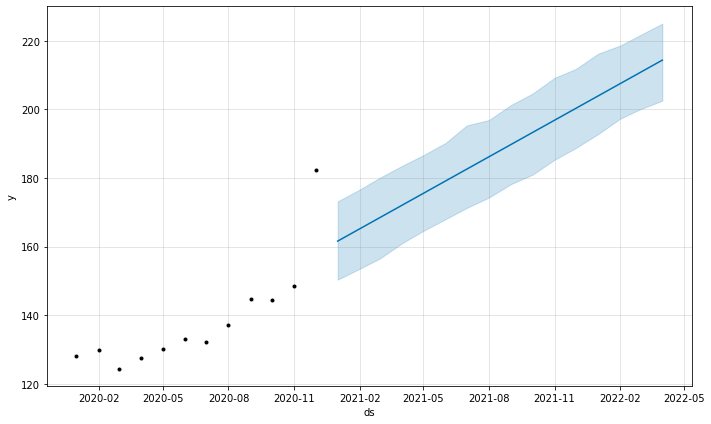

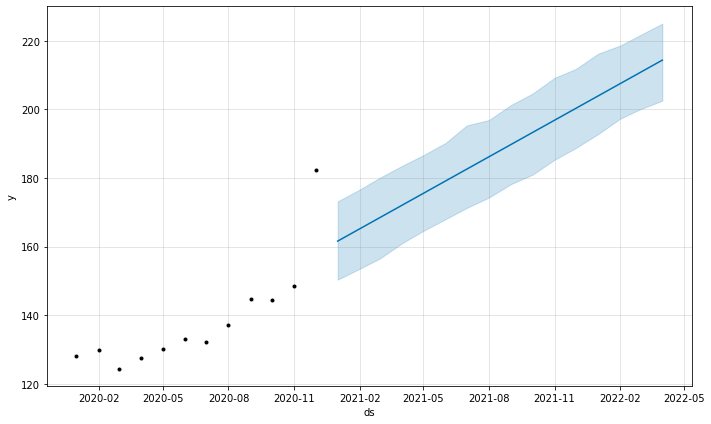

In [88]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
# pyplot.show()

In [89]:
sampai_agustus = forecast['yhat'][:8].values
len(sampai_agustus)

8

In [90]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,161.586664,150.357946,173.161805,161.586525,161.586792,0.0,0.0,0.0,0.0,0.0,0.0,161.586664
1,2021-02-01,165.181164,153.544692,176.628667,165.180639,165.181697,0.0,0.0,0.0,0.0,0.0,0.0,165.181164
2,2021-03-01,168.427810,156.494230,180.055165,168.426724,168.428795,0.0,0.0,0.0,0.0,0.0,0.0,168.427810
3,2021-04-01,172.022310,160.933304,183.502187,172.020579,172.023851,0.0,0.0,0.0,0.0,0.0,0.0,172.022310
4,2021-05-01,175.500858,164.562396,186.636019,175.498387,175.503023,0.0,0.0,0.0,0.0,0.0,0.0,175.500858
5,2021-06-01,179.095359,167.957742,190.180057,179.092026,179.098220,0.0,0.0,0.0,0.0,0.0,0.0,179.095359
6,2021-07-01,182.573907,171.273156,195.315475,182.569766,182.577575,0.0,0.0,0.0,0.0,0.0,0.0,182.573907
7,2021-08-01,186.168407,174.285632,196.876456,186.163213,186.172889,0.0,0.0,0.0,0.0,0.0,0.0,186.168407
8,2021-09-01,189.762908,178.214643,201.278299,189.756673,189.768356,0.0,0.0,0.0,0.0,0.0,0.0,189.762908
9,2021-10-01,193.241456,180.940511,204.583203,193.234085,193.247980,0.0,0.0,0.0,0.0,0.0,0.0,193.241456


In [41]:
df

,ds,y
0,2020-01-01,128.21
1,2020-02-01,129.8
2,2020-03-01,124.44
3,2020-04-01,127.55
4,2020-05-01,130.25
5,2020-06-01,133.02
6,2020-07-01,132.24
7,2020-08-01,137
8,2020-09-01,144.85
9,2020-10-01,144.5


In [43]:
sampai_agustus

array([161.58666395, 165.18116417, 168.42780954, 172.02230976,
       175.50085837, 179.09535859, 182.5739072 , 186.16840742])

In [82]:
from sklearn.metrics import r2_score
r2_score(sampai_agustus, real)

-44.007578592647235

In [83]:
for x in range(len(real)):
  print(str(sampai_agustus[x])+'==='+str(real[x]))

161.58666394649478===189.48
165.18116417164632===194.53
168.4278095362993===200.22
172.0223097614508===216.08
175.50085836643615===225.86
179.09535859158765===242.28
182.573907196573===257.92
186.16840742172454===266.44
